In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from google.colab import files

uploaded = files.upload()  # browse and upload dataset.csv
dd = pd.read_csv("dataset.csv")
# dd = pd.read_csv("../Lab6_Data Files/dataset.csv")
print(dd.head())
print("Data Shape: ", dd.shape)

Saving dataset.csv to dataset.csv
   0  5.1  3.5  1
0  1  4.9  3.0  1
1  2  4.7  3.2  1
2  3  4.6  3.1  1
3  4  5.0  3.6  1
4  5  5.4  3.9  1
Data Shape:  (99, 4)


In [ ]:
#Extracting Independent and dependent Variable
x= dd.iloc[:, [0,1]].values
y= dd.iloc[:,3].values
#print(x)
#print(y)
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
#print(x_test,y_test)
#Fitting Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
print(x_test,y_pred)

[[-0.853021   -0.40163838]
 [ 1.28555226  1.31906499]
 [-1.70845031 -1.34020385]
 [ 0.18062274  1.31906499]
 [ 0.8934805   2.10120288]
 [ 1.49940959 -0.71449353]
 [-1.20944988 -0.55806596]
 [ 0.82219472  1.47549256]
 [ 0.14497985  0.38049952]
 [ 1.57069536  0.38049952]
 [ 0.10933697  1.63192014]
 [ 1.4637667   0.53692709]
 [ 1.00040916  0.38049952]
 [-1.31637854  0.53692709]
 [-1.53023587 -1.653059  ]
 [-0.71044945 -0.08878322]
 [-0.99559255 -0.55806596]
 [-0.92430678 -0.71449353]
 [-0.60352079 -0.87092111]
 [-1.49459298 -0.87092111]
 [-0.24709191 -0.55806596]
 [ 0.43012296  1.00620983]
 [-1.67280742 -0.71449353]
 [ 0.75090895  1.31906499]
 [-0.17580614 -0.55806596]] [1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]


In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[12  0]
 [ 0 13]]


<ipython-input-8-f95b84dc55c0>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('purple', 'green'))(i), label = j)


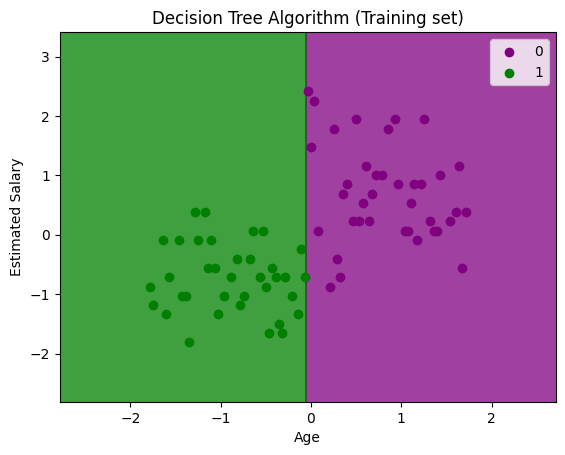

In [ ]:
import numpy as nm
import matplotlib.pyplot as mtp
#Visulaizing the trianing set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))

mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
   mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('purple', 'green'))(i), label = j)
mtp.title('Decision Tree Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

<ipython-input-9-6809f2a3bf11>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  c = ListedColormap(('purple', 'green'))(i), label = j)


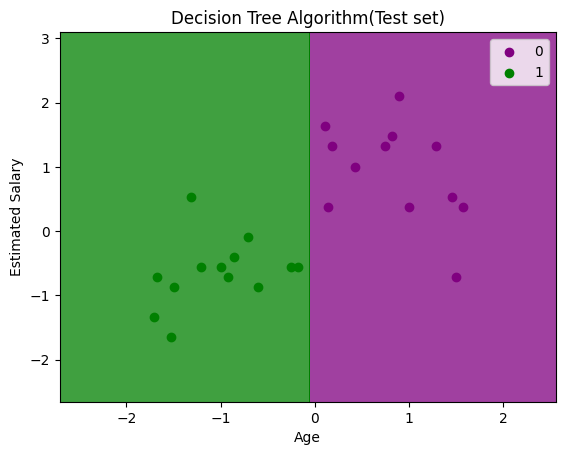

In [ ]:
#Visulaizing the test set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))

mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  c = ListedColormap(('purple', 'green'))(i), label = j)
mtp.title('Decision Tree Algorithm(Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()
